## 1. Configuração Inicial

Primeiro, vamos instalar e importar as bibliotecas necessárias.

In [ ]:
# Instalação das bibliotecas (execute apenas uma vez)
!pip install openai numpy scipy matplotlib scikit-learn -q

In [27]:
import warnings
from dotenv import load_dotenv
from openai import OpenAI

# Importando funções do módulo local
from embedding_utils import (
    get_embedding,
    cosine_similarity,
    plot_similarity_matrix,
    plot_embeddings_2d,
    comparar_palavras,
    buscar_afirmacao_mais_relevante,
    mostrar_busca,
)

warnings.filterwarnings("ignore")

# Carrega variáveis do arquivo .env
load_dotenv()

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [28]:
# A chave da API é carregada automaticamente do arquivo .env
client = OpenAI()

print("✅ Cliente OpenAI configurado!")

✅ Cliente OpenAI configurado!


## 3. Grupos de Palavras Relacionadas

Vamos definir três grupos de palavras semanticamente relacionadas:
- 🍎 **Frutas**: palavras relacionadas a frutas
- 🚗 **Veículos**: palavras relacionadas a transporte
- 🐶 **Animais**: palavras relacionadas a animais

In [29]:
# Definindo grupos de palavras relacionadas
grupos = {
    "🍎 Frutas": ["maçã", "banana", "laranja", "morango", "uva"],
    "🚗 Veículos": ["carro", "moto", "bicicleta", "ônibus", "caminhão"],
    "🐶 Animais": [
        "cão",
        "gato",
        "vaca",
        "cavalo",
        "ovelha",
        # "dog",
        # "cat",
        # "perro",
        # "chien",
    ],
}

# Vamos visualizar os grupos
for grupo, palavras in grupos.items():
    print(f"{grupo}: {', '.join(palavras)}")

🍎 Frutas: maçã, banana, laranja, morango, uva
🚗 Veículos: carro, moto, bicicleta, ônibus, caminhão
🐶 Animais: cão, gato, vaca, cavalo, ovelha


## 4. Gerando Embeddings para Cada Palavra

Agora vamos gerar os embeddings para todas as palavras.

In [30]:
# Gerando embeddings para todas as palavras
embeddings = {}
todas_palavras = []
todos_embeddings = []
cores = []

cor_por_grupo = {"🍎 Frutas": "red", "🚗 Veículos": "blue", "🐶 Animais": "green"}

print("Gerando embeddings...\n")

for grupo, palavras in grupos.items():
    print(f"Processando {grupo}...")
    for palavra in palavras:
        embedding = get_embedding(client, palavra)
        embeddings[palavra] = {"embedding": embedding, "grupo": grupo}
        todas_palavras.append(palavra)
        todos_embeddings.append(embedding)
        cores.append(cor_por_grupo[grupo])
        print(f"  ✓ {palavra} (vetor com {len(embedding)} dimensões)")

print(f"\n✅ Total: {len(embeddings)} embeddings gerados!")
print(f"📐 Cada embedding tem {len(embedding)} dimensões")

Gerando embeddings...

Processando 🍎 Frutas...
  ✓ maçã (vetor com 3072 dimensões)
  ✓ banana (vetor com 3072 dimensões)
  ✓ laranja (vetor com 3072 dimensões)
  ✓ morango (vetor com 3072 dimensões)
  ✓ uva (vetor com 3072 dimensões)
Processando 🚗 Veículos...
  ✓ carro (vetor com 3072 dimensões)
  ✓ moto (vetor com 3072 dimensões)
  ✓ bicicleta (vetor com 3072 dimensões)
  ✓ ônibus (vetor com 3072 dimensões)
  ✓ caminhão (vetor com 3072 dimensões)
Processando 🐶 Animais...
  ✓ cão (vetor com 3072 dimensões)
  ✓ gato (vetor com 3072 dimensões)
  ✓ vaca (vetor com 3072 dimensões)
  ✓ cavalo (vetor com 3072 dimensões)
  ✓ ovelha (vetor com 3072 dimensões)

✅ Total: 15 embeddings gerados!
📐 Cada embedding tem 3072 dimensões


## 5. Calculando Similaridade Entre Palavras

Vamos calcular a similaridade de cosseno entre algumas palavras para demonstrar que:
- Palavras do **mesmo grupo** têm alta similaridade
- Palavras de **grupos diferentes** têm baixa similaridade

In [31]:
# Comparando palavras do MESMO grupo
print("═" * 50)
print("🔵 SIMILARIDADE ENTRE PALAVRAS DO MESMO GRUPO")
print("═" * 50)

comparacoes_mesmo_grupo = [
    ("uva", "morango"),
    ("carro", "moto"),
    ("cão", "gato"),
]

for palavra1, palavra2 in comparacoes_mesmo_grupo:
    sim = cosine_similarity(
        embeddings[palavra1]["embedding"], embeddings[palavra2]["embedding"]
    )
    print(f"{palavra1} ↔ {palavra2}: {sim:.4f} ({sim*100:.1f}%)")

══════════════════════════════════════════════════
🔵 SIMILARIDADE ENTRE PALAVRAS DO MESMO GRUPO
══════════════════════════════════════════════════
uva ↔ morango: 0.4074 (40.7%)
carro ↔ moto: 0.5042 (50.4%)
cão ↔ gato: 0.5987 (59.9%)


In [32]:
# Comparando palavras de GRUPOS DIFERENTES
print("═" * 50)
print("🔴 SIMILARIDADE ENTRE PALAVRAS DE GRUPOS DIFERENTES")
print("═" * 50)

comparacoes_grupos_diferentes = [
    ("uva", "caminhão"),
    ("banana", "cão"),
    ("ônibus", "vaca"),
]

for palavra1, palavra2 in comparacoes_grupos_diferentes:
    sim = cosine_similarity(
        embeddings[palavra1]["embedding"], embeddings[palavra2]["embedding"]
    )
    print(f"{palavra1} ↔ {palavra2}: {sim:.4f} ({sim*100:.1f}%)")

══════════════════════════════════════════════════
🔴 SIMILARIDADE ENTRE PALAVRAS DE GRUPOS DIFERENTES
══════════════════════════════════════════════════
uva ↔ caminhão: 0.3022 (30.2%)
banana ↔ cão: 0.2262 (22.6%)
ônibus ↔ vaca: 0.3172 (31.7%)


## 6. Matriz de Similaridade

Vamos criar uma matriz visual mostrando a similaridade entre todas as palavras.

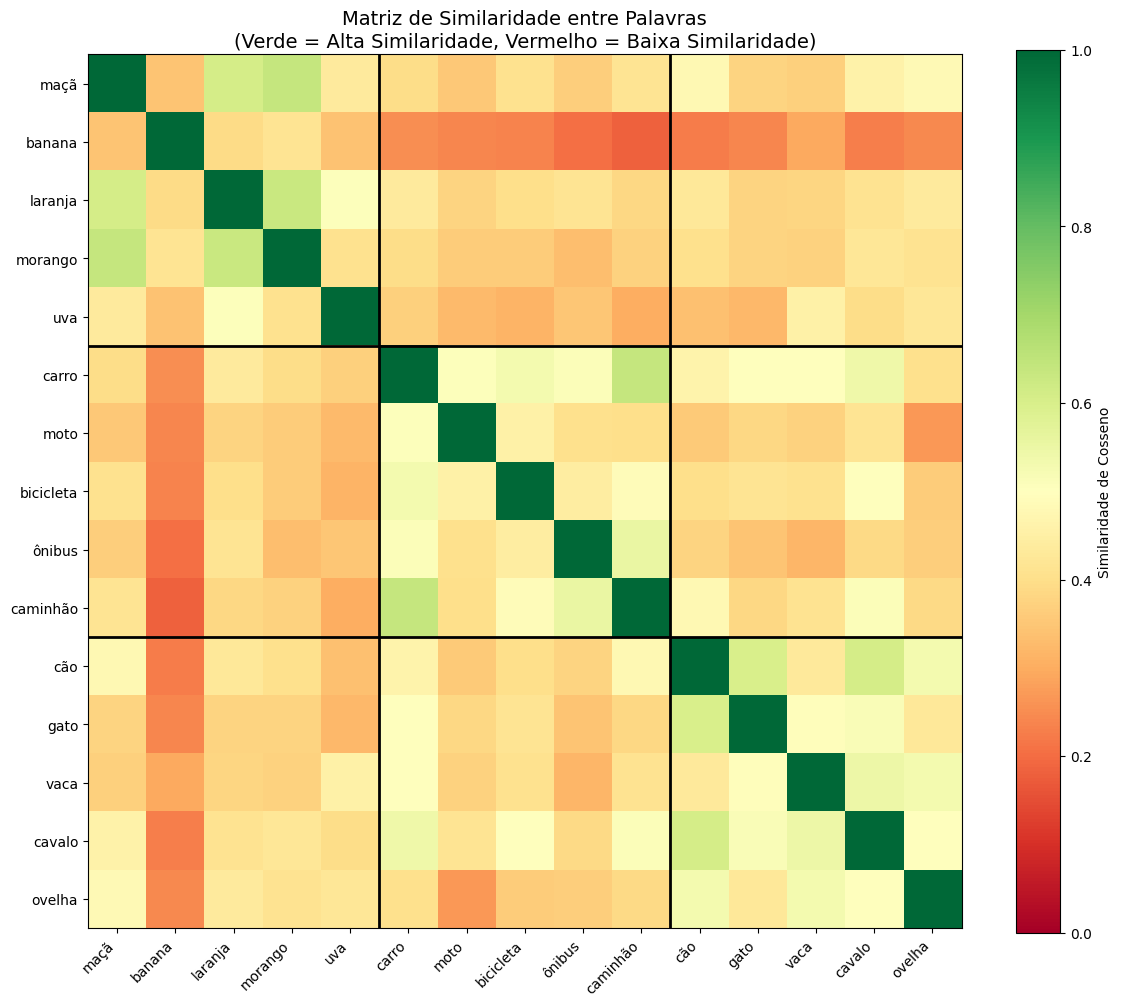


📊 Observe como os blocos na diagonal (mesmo grupo) são mais verdes!


In [33]:
# Chamando a função plot_similarity_matrix (importada de embedding_utils.py)
matriz = plot_similarity_matrix(todas_palavras, embeddings, group_separators=[4.5, 9.5])

print("\n📊 Observe como os blocos na diagonal (mesmo grupo) são mais verdes!")

## 7. Visualização 2D com t-SNE

Os embeddings têm muitas dimensões (1536). Vamos usar **t-SNE** para reduzir para 2 dimensões e visualizar.

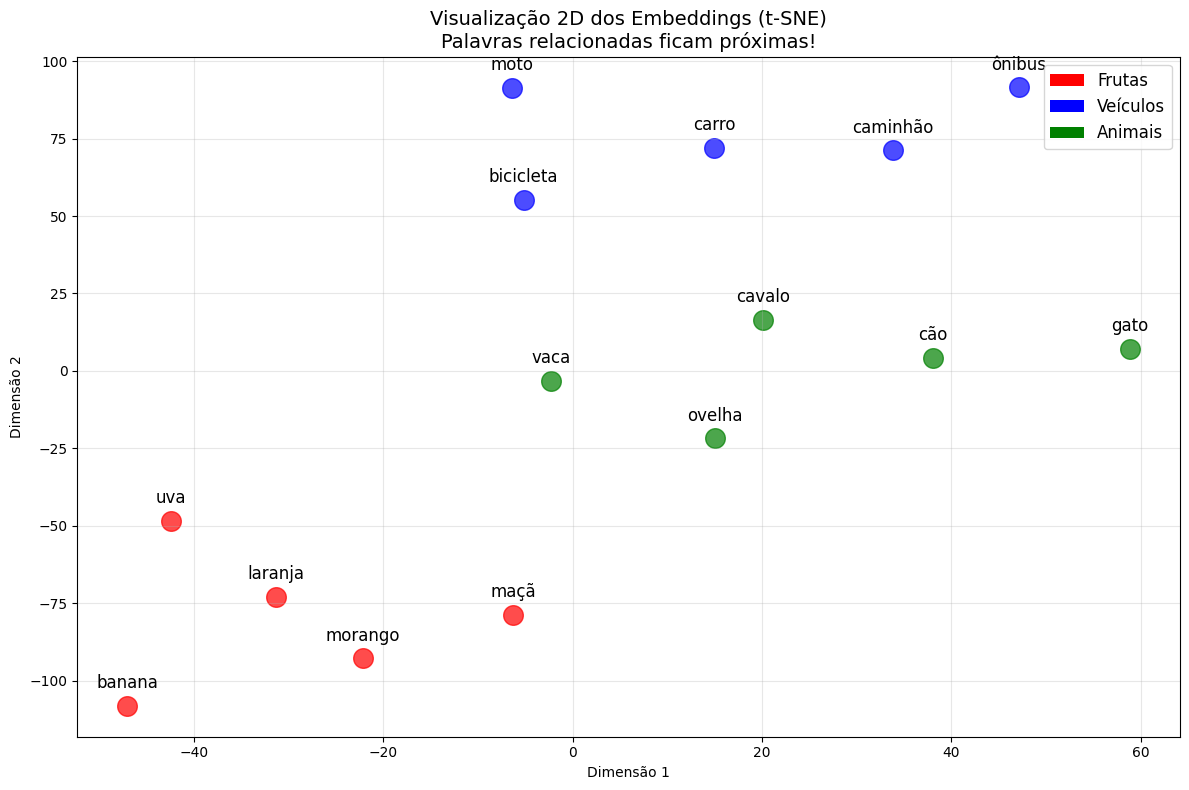


🎯 Note como palavras do mesmo grupo se agrupam!


In [34]:
# Configuração da legenda
legenda_grupos = [
    {"color": "red", "label": "Frutas"},
    {"color": "blue", "label": "Veículos"},
    {"color": "green", "label": "Animais"},
]

# Chamando a função plot_embeddings_2d (importada de embedding_utils.py)
embeddings_2d = plot_embeddings_2d(
    todas_palavras, todos_embeddings, cores, legenda_config=legenda_grupos
)

print("\n🎯 Note como palavras do mesmo grupo se agrupam!")

## 📝 Resumo

Neste notebook, aprendemos:

1. **O que são embeddings**: representações vetoriais de texto
2. **Como gerar embeddings**: usando a API da OpenAI
3. **Similaridade de cosseno**: mede o quão "próximos" dois vetores estão
4. **Propriedade semântica**: palavras relacionadas têm embeddings similares

### 🚀 Próximos passos

No próximo notebook, vamos:
- Trabalhar com **frases e parágrafos** (não apenas palavras)
- Criar um sistema de **busca semântica**
- Construir um **sistema RAG** completo!

## 9. Embeddings de Frases: Busca Semântica

Agora vamos trabalhar com **frases completas** em vez de palavras isoladas.

### A ideia:
1. Criar uma "base de conhecimento" com afirmações/fatos
2. Fazer perguntas em linguagem natural
3. Encontrar qual afirmação responde melhor cada pergunta

**Isso é a base do RAG (Retrieval Augmented Generation)!**

In [35]:
# Base de conhecimento: afirmações/fatos
afirmacoes = [
    # Geografia (índices 0-5)
    "A capital do Brasil é Brasília",
    "A Torre Eiffel fica em Paris",
    "O Rio Amazonas é o maior rio do mundo em volume de água",
    "Tóquio é a capital do Japão",
    "A Muralha da China tem mais de 20 mil quilômetros",
    "O Monte Everest é a montanha mais alta do mundo",
    # Natureza/Ciência (índices 6-11)
    "A casca da banana é amarela",
    "A água ferve a 100 graus Celsius",
    "O sol é uma estrela",
    "O coração humano tem quatro câmaras",
    "A luz viaja a 300 mil quilômetros por segundo",
    "O DNA contém as informações genéticas dos seres vivos",
    # Pessoas/Cultura (índices 12-5)
    "Messi nasceu na Argentina",
    "Leonardo da Vinci pintou a Mona Lisa",
    "Cristiano Ronaldo é Português",
    "Beethoven compôs a Nona Sinfonia",
    "Shakespeare escreveu Romeu e Julieta",
    # Tecnologia (índices 16-19)
    "Python é uma linguagem de programação",
    "O primeiro computador ocupava uma sala inteira",
    "A internet foi criada na década de 1960",
]

print("📚 Base de Conhecimento:")
print("=" * 60)
for i, afirmacao in enumerate(afirmacoes, 1):
    print(f"{i:2}. {afirmacao}")

📚 Base de Conhecimento:
 1. A capital do Brasil é Brasília
 2. A Torre Eiffel fica em Paris
 3. O Rio Amazonas é o maior rio do mundo em volume de água
 4. Tóquio é a capital do Japão
 5. A Muralha da China tem mais de 20 mil quilômetros
 6. O Monte Everest é a montanha mais alta do mundo
 7. A casca da banana é amarela
 8. A água ferve a 100 graus Celsius
 9. O sol é uma estrela
10. O coração humano tem quatro câmaras
11. A luz viaja a 300 mil quilômetros por segundo
12. O DNA contém as informações genéticas dos seres vivos
13. Messi nasceu na Argentina
14. Leonardo da Vinci pintou a Mona Lisa
15. Cristiano Ronaldo é Português
16. Beethoven compôs a Nona Sinfonia
17. Shakespeare escreveu Romeu e Julieta
18. Python é uma linguagem de programação
19. O primeiro computador ocupava uma sala inteira
20. A internet foi criada na década de 1960


In [36]:
# Gerando embeddings para todas as afirmações
print("Gerando embeddings das afirmações...\n")

embeddings_afirmacoes = []
for afirmacao in afirmacoes:
    emb = get_embedding(client, afirmacao)
    embeddings_afirmacoes.append(emb)
    print(f"✓ {afirmacao[:40]}...")

print(f"\n✅ {len(embeddings_afirmacoes)} embeddings de frases gerados!")

Gerando embeddings das afirmações...

✓ A capital do Brasil é Brasília...
✓ A Torre Eiffel fica em Paris...
✓ O Rio Amazonas é o maior rio do mundo em...
✓ Tóquio é a capital do Japão...
✓ A Muralha da China tem mais de 20 mil qu...
✓ O Monte Everest é a montanha mais alta d...
✓ A casca da banana é amarela...
✓ A água ferve a 100 graus Celsius...
✓ O sol é uma estrela...
✓ O coração humano tem quatro câmaras...
✓ A luz viaja a 300 mil quilômetros por se...
✓ O DNA contém as informações genéticas do...
✓ Messi nasceu na Argentina...
✓ Leonardo da Vinci pintou a Mona Lisa...
✓ Cristiano Ronaldo é Português...
✓ Beethoven compôs a Nona Sinfonia...
✓ Shakespeare escreveu Romeu e Julieta...
✓ Python é uma linguagem de programação...
✓ O primeiro computador ocupava uma sala i...
✓ A internet foi criada na década de 1960...

✅ 20 embeddings de frases gerados!


In [37]:
len(embeddings_afirmacoes[0])  # Verificando a dimensão do embedding

3072

### Visualização 2D das Afirmações

Vamos ver como as afirmações se distribuem no espaço vetorial usando t-SNE.

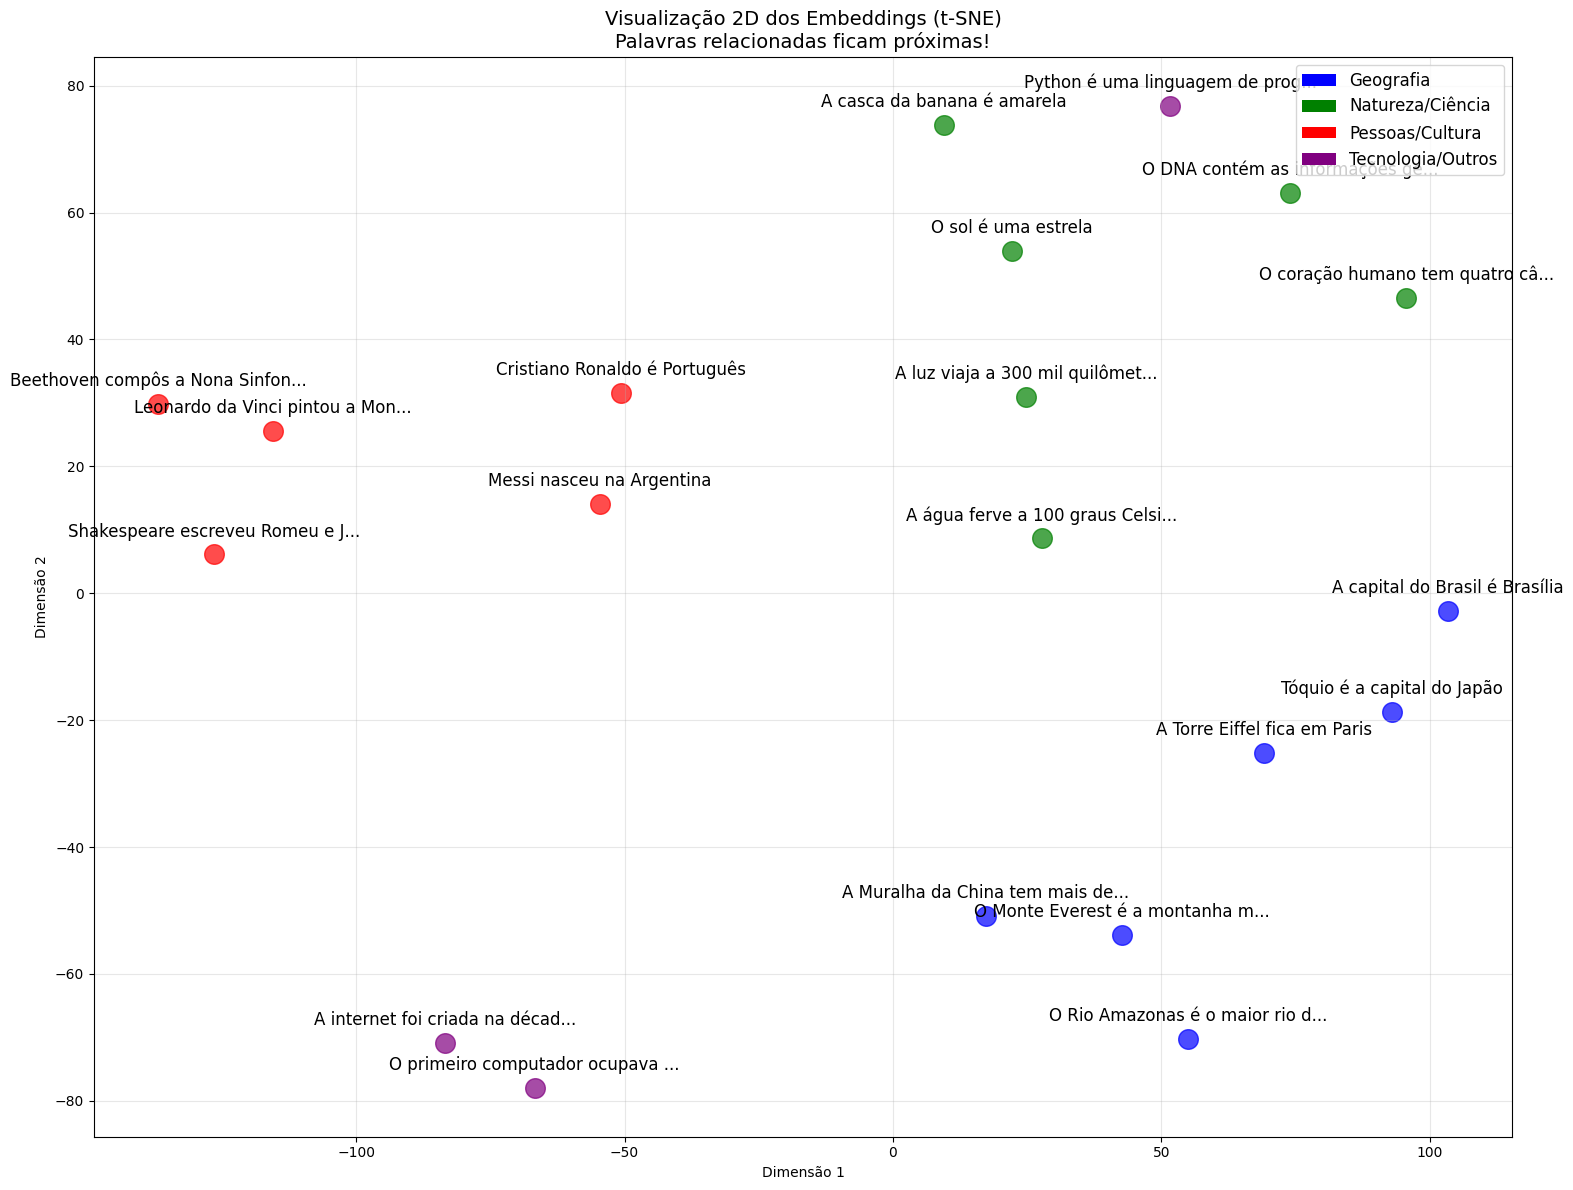


🎯 Observe como afirmações de temas similares tendem a se agrupar!


In [38]:
# Categorias para colorir (baseado no tema da afirmação)
categorias = {
    "Geografia": [
        0,
        1,
        2,
        3,
        4,
        5,
    ],  # Brasil, Torre Eiffel, Amazonas, Tóquio, Muralha, Everest
    "Natureza/Ciência": [6, 7, 8, 9, 10, 11],  # banana, água, sol, coração, luz, DNA
    "Pessoas/Cultura": [
        12,
        13,
        14,
        15,
        16,
    ],  # Messi, Da Vinci, Einstein, Beethoven, Shakespeare
    "Tecnologia/Outros": [17, 18, 19],  # Python, Computador, Internet
}

cores_map = {
    "Geografia": "blue",
    "Natureza/Ciência": "green",
    "Pessoas/Cultura": "red",
    "Tecnologia/Outros": "purple",
}

# Criando lista de cores para cada afirmação
cores_afirmacoes = ["gray"] * len(afirmacoes)
for categoria, indices in categorias.items():
    for idx in indices:
        cores_afirmacoes[idx] = cores_map[categoria]

# Configuração da legenda
legenda_afirmacoes = [
    {"color": "blue", "label": "Geografia"},
    {"color": "green", "label": "Natureza/Ciência"},
    {"color": "red", "label": "Pessoas/Cultura"},
    {"color": "purple", "label": "Tecnologia/Outros"},
]

# Usando a função de visualização 2D
embeddings_afirmacoes_2d = plot_embeddings_2d(
    palavras=[a[:30] + "..." if len(a) > 30 else a for a in afirmacoes],
    embeddings_list=embeddings_afirmacoes,
    cores=cores_afirmacoes,
    legenda_config=legenda_afirmacoes,
    perplexity=5,
    figsize=(16, 12),
)

print("\n🎯 Observe como afirmações de temas similares tendem a se agrupar!")

### Testando a Busca Semântica

Vamos fazer perguntas e ver qual afirmação é mais relevante para cada uma!

In [ ]:
# Teste 1: Pergunta sobre geografia
mostrar_busca(client, "Qual é a capital do Brasil?", afirmacoes, embeddings_afirmacoes)


════════════════════════════════════════════════════════════
❓ PERGUNTA: Qual é a capital do Brasil?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [██████████████████████░░░░░░░░] 74.6%
   → A capital do Brasil é Brasília

🥈 [████████████░░░░░░░░░░░░░░░░░░] 42.6%
   → Tóquio é a capital do Japão

🥉 [███████░░░░░░░░░░░░░░░░░░░░░░░] 25.8%
   → A Torre Eiffel fica em Paris



In [ ]:
# Teste 2: Pergunta sobre esporte
mostrar_busca(client, "Onde o Messi nasceu?", afirmacoes, embeddings_afirmacoes)


════════════════════════════════════════════════════════════
❓ PERGUNTA: Onde o Messi nasceu?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [██████████████████████░░░░░░░░] 75.3%
   → Messi nasceu na Argentina

🥈 [██████░░░░░░░░░░░░░░░░░░░░░░░░] 21.9%
   → A capital do Brasil é Brasília

🥉 [██████░░░░░░░░░░░░░░░░░░░░░░░░] 20.9%
   → Tóquio é a capital do Japão



In [ ]:
# Teste 3: Pergunta sobre ciência
mostrar_busca(
    client,
    "A que temperatura a água entra em ebulição?",
    afirmacoes,
    embeddings_afirmacoes,
)


════════════════════════════════════════════════════════════
❓ PERGUNTA: A que temperatura a água entra em ebulição?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [████████████████████░░░░░░░░░░] 66.7%
   → A água ferve a 100 graus Celsius

🥈 [████████░░░░░░░░░░░░░░░░░░░░░░] 28.4%
   → A luz viaja a 300 mil quilômetros por segundo

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 27.3%
   → O Monte Everest é a montanha mais alta do mundo



In [ ]:
# Teste 4: Pergunta sobre frutas (formulada de forma diferente)
mostrar_busca(client, "De que cor é uma banana?", afirmacoes, embeddings_afirmacoes)


════════════════════════════════════════════════════════════
❓ PERGUNTA: De que cor é uma banana?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [█████████████████████░░░░░░░░░] 71.9%
   → A casca da banana é amarela

🥈 [████████░░░░░░░░░░░░░░░░░░░░░░] 28.1%
   → Python é uma linguagem de programação

🥉 [███████░░░░░░░░░░░░░░░░░░░░░░░] 26.4%
   → O sol é uma estrela



In [ ]:
# Teste 5: Pergunta sobre arte
mostrar_busca(client, "Quem pintou a Mona Lisa?", afirmacoes, embeddings_afirmacoes)


════════════════════════════════════════════════════════════
❓ PERGUNTA: Quem é o autor da La Gioconda?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [█████████████████░░░░░░░░░░░░░] 57.6%
   → Leonardo da Vinci pintou a Mona Lisa

🥈 [████████░░░░░░░░░░░░░░░░░░░░░░] 27.7%
   → Albert Einstein desenvolveu a teoria da relatividade

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 27.2%
   → Shakespeare escreveu Romeu e Julieta



In [ ]:
# Teste 6: Pergunta em linguagem bem diferente da afirmação
mostrar_busca(
    client,
    "Qual é o pico mais elevado do planeta Terra?",
    afirmacoes,
    embeddings_afirmacoes,
)


════════════════════════════════════════════════════════════
❓ PERGUNTA: Qual é o pico mais elevado do planeta Terra?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [█████████████████░░░░░░░░░░░░░] 57.2%
   → O Monte Everest é a montanha mais alta do mundo

🥈 [█████████░░░░░░░░░░░░░░░░░░░░░] 31.0%
   → A água ferve a 100 graus Celsius

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 27.4%
   → Tóquio é a capital do Japão



In [ ]:
mostrar_busca(
    client,
    "Como é dividido nosso principal músculo que bombeia sangue?",
    afirmacoes,
    embeddings_afirmacoes,
)


════════════════════════════════════════════════════════════
❓ PERGUNTA: Como é dividido nosso principal músculo que bombeia sangue?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [█████████████████░░░░░░░░░░░░░] 58.5%
   → O coração humano tem quatro câmaras

🥈 [███████░░░░░░░░░░░░░░░░░░░░░░░] 25.5%
   → O primeiro computador ocupava uma sala inteira

🥉 [███████░░░░░░░░░░░░░░░░░░░░░░░] 24.0%
   → O Rio Amazonas é o maior rio do mundo em volume de água



In [ ]:
mostrar_busca(
    client,
    "Qual o tamanho das máquinas de computação primordias?",
    afirmacoes,
    embeddings_afirmacoes,
)


════════════════════════════════════════════════════════════
❓ PERGUNTA: Qual o tamanho das máquinas de computação primordias?
════════════════════════════════════════════════════════════

📊 Afirmações mais relevantes:

🥇 [████████████████████░░░░░░░░░░] 67.3%
   → O primeiro computador ocupava uma sala inteira

🥈 [█████████░░░░░░░░░░░░░░░░░░░░░] 30.6%
   → A internet foi criada inicialmente para uso militar

🥉 [████████░░░░░░░░░░░░░░░░░░░░░░] 26.7%
   → Albert Einstein desenvolveu a teoria da relatividade



### 💡 O que aprendemos?

1. **Busca semântica funciona!** - O sistema encontra a afirmação correta mesmo quando a pergunta usa palavras diferentes
2. **Não é busca por palavras-chave** - "pico mais elevado" encontrou "montanha mais alta" 
3. **Base para RAG** - Isso é exatamente o que sistemas RAG fazem: encontram informações relevantes para dar contexto ao LLM

### 🚀 Próximo passo: RAG completo

No próximo notebook, vamos combinar:
- **Busca semântica** (o que fizemos aqui)
- **LLM** (para gerar respostas)
- **Contexto** (as afirmações encontradas)

Isso é o **RAG (Retrieval Augmented Generation)**!